# MQ-5

## Ro calculation

### Specifications

#### Standard Work Condition

    Vc (Circuit Voltage)       :  5v +/- 0.1
    Vh (Heating Voltage)       :  5v +/- 0.1
    Rl (Load Resistance)       :  20KOhm
    Rh (Heater Resistance)     :  33Ohm +/- 5%
    Ph (Heating consumption)   :  less than 800mw
    

#### Sensitivity Characteristic:

    Rs (Sensing Resistance)    : 10kOhm  -  60kOhm (5000ppm methane)
    Preheat Time               : Over 24 hour
    
    Detecting Concentration Scope:
        LPG, LNG, Natuarl Gas, Propane and Town Gas:  200ppm  - 10000ppm 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
## Gas concentration values referenced in the datasheet

POINTS = {
    # Hydrogen
    'h2' : {
        'p1' : {'x': 200,   'y':1.730},
        'p2' : {'x': 500,   'y':1.215},
        'p3' : {'x': 800,   'y':1.050},
        'p4' : {'x': 1000,  'y':0.988},
        'p5' : {'x': 1500,  'y':0.875},
        'p6' : {'x': 2000,  'y':0.823},
        'p7' : {'x': 3000,  'y':0.765},
        'p8' : {'x': 5000,  'y':0.728},
        'p9' : {'x': 10000, 'y':0.657}
    },

    # Liquefied Petroleum Gas
    'lpg' : {
        'p1' : {'x': 200,   'y':0.698},
        'p2' : {'x': 500,   'y':0.473},
        'p3' : {'x': 800,   'y':0.389},
        'p4' : {'x': 1000,  'y':0.355},
        'p5' : {'x': 1500,  'y':0.297},
        'p6' : {'x': 2000,  'y':0.268},
        'p7' : {'x': 3000,  'y':0.230},
        'p8' : {'x': 5000,  'y':0.189},
        'p9' : {'x': 10000, 'y':0.145}
    },

    # Methane
    'ch4' : {
        'p1' : {'x': 200,   'y':0.952},
        'p2' : {'x': 500,   'y':0.673},
        'p3' : {'x': 800,   'y':0.554},
        'p4' : {'x': 1000,  'y':0.515},
        'p5' : {'x': 1500,  'y':0.445},
        'p6' : {'x': 2000,  'y':0.400},
        'p7' : {'x': 3000,  'y':0.340},
        'p8' : {'x': 5000,  'y':0.275},
        'p9' : {'x': 10000, 'y':0.204}
    },

    # Carbon Monoxide
    'co' : {
        'p1' : {'x': 200,   'y':3.890},
        'p2' : {'x': 500,   'y':3.201},
        'p3' : {'x': 800,   'y':3.012},
        'p4' : {'x': 1000,  'y':2.886},
        'p5' : {'x': 1500,  'y':2.666},
        'p6' : {'x': 2000,  'y':2.555},
        'p7' : {'x': 3000,  'y':2.448},
        'p8' : {'x': 5000,  'y':2.375},
        'p9' : {'x': 10000, 'y':2.276}
    },

    'alcohol' : {
        'p1' : {'x': 200,   'y':3.507},
        'p2' : {'x': 500,   'y':2.921},
        'p3' : {'x': 800,   'y':2.666},
        'p4' : {'x': 1000,  'y':2.555},
        'p5' : {'x': 1500,  'y':2.332},
        'p6' : {'x': 2000,  'y':2.235},
        'p7' : {'x': 3000,  'y':2.039},
        'p8' : {'x': 5000,  'y':1.817},
        'p9' : {'x': 10000, 'y':1.441}
    }   
}


AIR = 6.464

GASES = ['h2', 'lpg', 'ch4', 'co', 'alcohol']

In [3]:
# RS value calculation
Rs    = lambda Vcc, Vrl, RL : ((Vcc * RL) / Vrl) - RL

# R0 value calculation
R0    = lambda Rs, air : Rs / air

# RS/Ro value calculation (ratio)
Ratio = lambda Rs, R0: Rs / R0

# log(y) = m.log(x) + b
# m
M     = lambda p1, p2 : (math.log10( p2['y'] / p1['y'] )) / (math.log10(p2['x']/p1['x']))
# b
B     = lambda p, m : math.log10(p['y']) - (m * math.log10(p['x']))

# PPM value calculation 
PPM   = lambda  racio, m, b: 10 ** ((math.log10(racio) - b) / m)

In [4]:
## Calculate the points to be used for the calculation of _m_ and _b_ according to the _ratio_ value 
def getPoints(racio, values):
    size = len(values)
    for idx in range(size - 1):
        if racio >= values[idx]['y']:
            if idx == 0:
                return (values[0], values[1])
            return(values[idx - 1], values[idx])
    return(values[size - 2], values[size - 1])

In [5]:
pList = {}
for gas in GASES:
    pList[gas] = list(POINTS[gas].values())

In [6]:
col_list = ["date", "mq5_1", "mq5_2"]
df = pd.read_csv('RoomInNormalDay_Jun[14 - 15].csv', usecols=col_list)

df['date']= pd.to_datetime(df['date'])

mq5_1 = df[["date","mq5_1"]]
mq5_2 = df[["date","mq5_2"]]

### Ro values to be considered

- __Sensor 1__: 28.2 kOhms
- __Sensor 2__: 18.81 kOhms

In [7]:
# MQ 5 - sensor 1
sensor1 = {}
sensor1['Vcc'] = 5     #volts
sensor1['RL']  = 10    #kOhms
sensor1['AIR'] = AIR   
sensor1['Ro']  = 28.2  #kOhms


# MQ 5 - sensor 2
sensor2 = {}
sensor2['Vcc'] = 5     #volts
sensor2['RL']  = 10    #kOhms
sensor2['AIR'] = AIR   
sensor2['Ro']  = 18.81 #kOhms

In [8]:
# Min; Mean; Median; Quantile [0.25, 0.5, 0.75]; Max

Vrl = [
    mq5_1['mq5_1'].min(),
    mq5_1['mq5_1'].mean(), 
    mq5_1['mq5_1'].quantile(0.25),
    mq5_1['mq5_1'].quantile(0.5),
    mq5_1['mq5_1'].quantile(0.75),
    mq5_1['mq5_1'].max()]

sensor1['Rs'] = [Rs(sensor1['Vcc'] , v, sensor1['RL'] ) for v in Vrl]
sensor1['Ratio'] = [Ratio(rs, sensor1['Ro']) for rs in sensor1['Rs']]

ppm1 = {}
for gas in GASES:
    ppm1[gas] = []

for r in sensor1['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm1[gas].append(PPM(r, m, b))

In [9]:
# Min; Mean; Median; Quantile [0.25, 0.5, 0.75]; Max
Vrl = [
    mq5_2['mq5_2'].min(),
    mq5_2['mq5_2'].mean(), 
    mq5_2['mq5_2'].quantile(0.25),
    mq5_2['mq5_2'].quantile(0.5),
    mq5_2['mq5_2'].quantile(0.75),
    mq5_2['mq5_2'].max()]

sensor2['Rs'] = [Rs(sensor2['Vcc'] , v, sensor2['RL'] ) for v in Vrl]
sensor2['Ratio'] = [Ratio(rs, sensor2['Ro']) for rs in sensor2['Rs']]

ppm2 = {}
for gas in GASES:
    ppm2[gas] = []

for r in sensor2['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm2[gas].append(PPM(r, m, b))

In [10]:
print(f"Period in which the readings were carried out: {mq5_1['date'].min()} - {mq5_1['date'].max()} \n")

print("Sensor 1")


print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('', 'Min', 'Mean', '1Q', '2Q', '3Q', 'Max'))

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('Rs/Ro', 
               round(sensor1['Ratio'][0],3),
               round(sensor1['Ratio'][1],3),
               round(sensor1['Ratio'][2],3),
               round(sensor1['Ratio'][3],3),
               round(sensor1['Ratio'][4],3),
               round(sensor1['Ratio'][5],3)))

for gas in GASES:
    print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
           .format(gas.upper(), 
                   round(ppm1[gas][0],3),
                   round(ppm1[gas][1],3),
                   round(ppm1[gas][2],3),
                   round(ppm1[gas][3],3),
                   round(ppm1[gas][4],3),
                   round(ppm1[gas][5],3)))
    
print("-"*(12*7))
    
print("Sensor 2")

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('', 'Min', 'Mean', '1Q', '2Q', '3Q', 'Max'))

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('Rs/Ro', 
               round(sensor2['Ratio'][0],3),
               round(sensor2['Ratio'][1],3),
               round(sensor2['Ratio'][2],3),
               round(sensor2['Ratio'][3],3),
               round(sensor2['Ratio'][4],3),
               round(sensor2['Ratio'][5],3)))

for gas in GASES:
    print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
           .format(gas.upper(), 
                   round(ppm2[gas][0],3),
                   round(ppm2[gas][1],3),
                   round(ppm2[gas][2],3),
                   round(ppm2[gas][3],3),
                   round(ppm2[gas][4],3),
                   round(ppm2[gas][5],3)))

Period in which the readings were carried out: 2022-06-14 09:56:00 - 2022-06-15 16:23:00 

Sensor 1
             Min          Mean         1Q           2Q           3Q           Max         
Rs/Ro        7.354        6.565        6.738        6.738        6.465        5.759       
H2           4.692        6.299        5.888        5.888        6.554        8.844       
LPG          0.781        1.021        0.96         0.96         1.058        1.389       
CH4          0.902        1.218        1.137        1.137        1.268        1.721       
CO           10.023       17.092       15.127       15.127       18.371       31.623      
ALCOHOL      4.89         8.639        7.584        7.584        9.329        16.647      
------------------------------------------------------------------------------------
Sensor 2
             Min          Mean         1Q           2Q           3Q           Max         
Rs/Ro        6.852        5.753        5.952        5.797        5.65         

In [11]:
font = {
    'family': 'serif',
    'color':  'tab:red',
    'weight': 'normal',
    'size': 14
}

font_title = {
    'family': 'serif',
    'color':  'tab:blue',
    'weight': 'normal',
    'size': 16,
}

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray','tab:olive','tab:cyan']

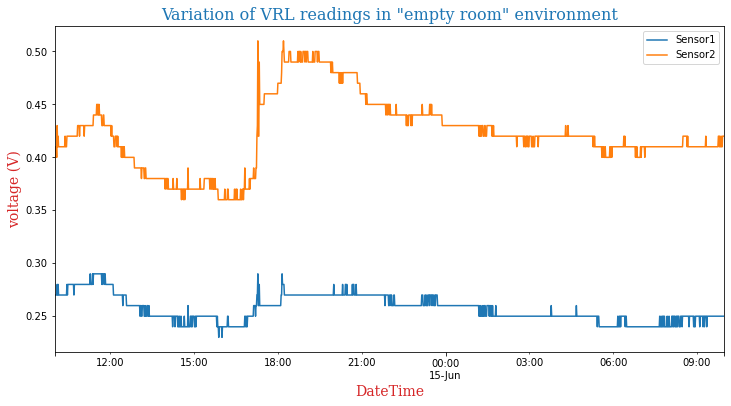

In [12]:
fdf = df[(df['date'] > '6/14/22 10:00 AM') & (df['date'] < '6/15/22 010:00 AM')]

ax = fdf.plot(x='date', y=["mq5_1","mq5_2"], 
              kind="line", figsize=(12, 6))

plt.title('Variation of VRL readings in "empty room" environment', fontdict=font_title)
plt.xlabel('DateTime',    fontdict=font)
plt.ylabel('voltage (V)', fontdict=font)
plt.legend(['Sensor1', 'Sensor2'], loc='best')


plt.show()

In [13]:
# MQ 5 Sensor1

sensor1['Rs'] = [Rs(sensor1['Vcc'] , v, sensor1['RL'] ) for v in mq5_1["mq5_1"]]
sensor1['Ratio'] = [Ratio(rs, sensor1['Ro']) for rs in sensor1['Rs']]

ppm1 = {}
for gas in GASES:
    ppm1[gas] = []
    
for r in sensor1['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm1[gas].append(PPM(r, m, b))

for gas in GASES:
    mq5_1[gas] = ppm1[gas]

In [14]:
# MQ 5 Sensor 2

sensor2['Rs'] = [Rs(sensor2['Vcc'] , v, sensor2['RL'] ) for v in mq5_2["mq5_2"]]
sensor2['Ratio'] = [Ratio(rs, sensor2['Ro']) for rs in sensor2['Rs']]
  
ppm2 = {}
for gas in GASES:
    ppm2[gas] = []
    
for r in sensor2['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm2[gas].append(PPM(r, m, b))
        
for gas in GASES:
    mq5_2[gas] = ppm2[gas]

In [15]:
mq5_1.describe()

,mq5_1,h2,lpg,ch4,co,alcohol
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,0.256242,6.329628,1.024814,1.223863,17.441475,8.843152
std,0.011444,0.790942,0.115904,0.155933,4.075135,2.213542
min,0.230000,4.692143,0.781368,0.901995,10.022695,4.889671
25%,0.250000,5.888427,0.960336,1.136834,15.127492,7.584109
50%,0.250000,5.888427,0.960336,1.136834,15.127492,7.584109
75%,0.260000,6.554494,1.058493,1.267993,18.370861,9.329434
max,0.290000,8.844208,1.389487,1.720667,31.622551,16.647403


In [16]:
mq5_2.describe()

,mq5_2,h2,lpg,ch4,co,alcohol
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,0.422970,8.994300,1.408464,1.751120,33.617034,17.856295
std,0.030172,1.857036,0.263134,0.368672,13.108024,7.477417
min,0.360000,5.636548,0.922957,1.087306,13.974971,6.969616
25%,0.410000,8.122080,1.286059,1.577632,27.098317,14.120505
50%,0.420000,8.694802,1.368154,1.691055,30.660862,16.108145
75%,0.430000,9.294349,1.453563,1.809941,34.600201,18.323861
max,0.510000,15.144286,2.264570,2.976483,83.834723,47.078352


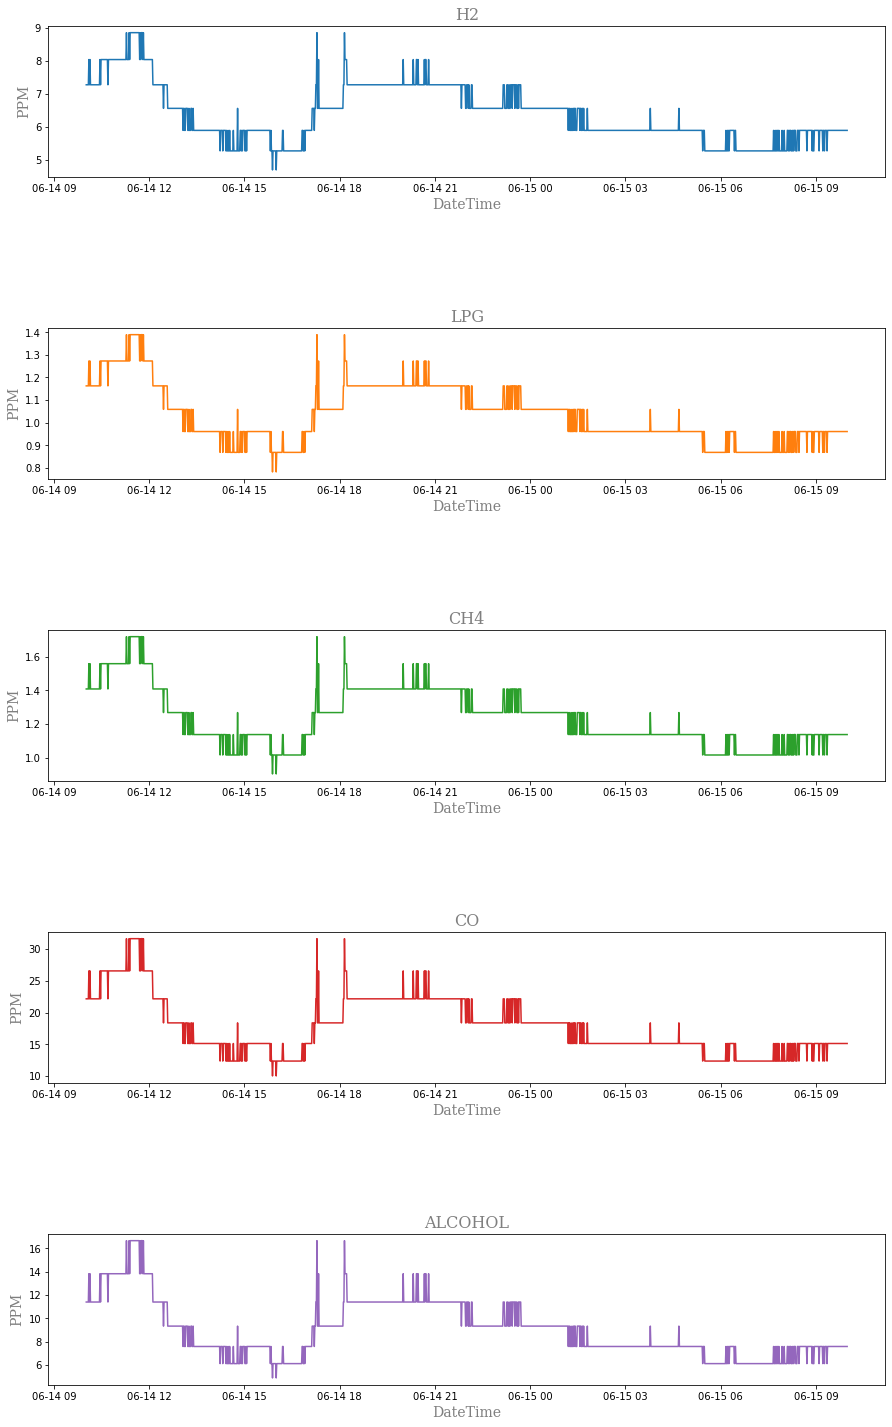

In [17]:
# Time Interval:
#           min: 2022-06-14 09:56:00
#           max: 2022-06-15 16:23:00 
  
fmq = mq5_1[(mq5_1['date'] > '6/14/22 10:00 AM') & (mq5_1['date'] < '6/15/22 010:00 AM')]

plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace = 1)

for idx in range(len(GASES)):
    plt.subplot(len(GASES) * 100 + 11 + idx)
    plt.plot(fmq['date']         , fmq[GASES[idx]],        color=colors[idx])
    plt.xlabel('DateTime'        , fontdict=font,          color='tab:gray')
    plt.ylabel('PPM'             , fontdict=font,          color='tab:gray')
    plt.title(GASES[idx].upper() , fontdict=font_title,    color='tab:gray')
    


plt.show()

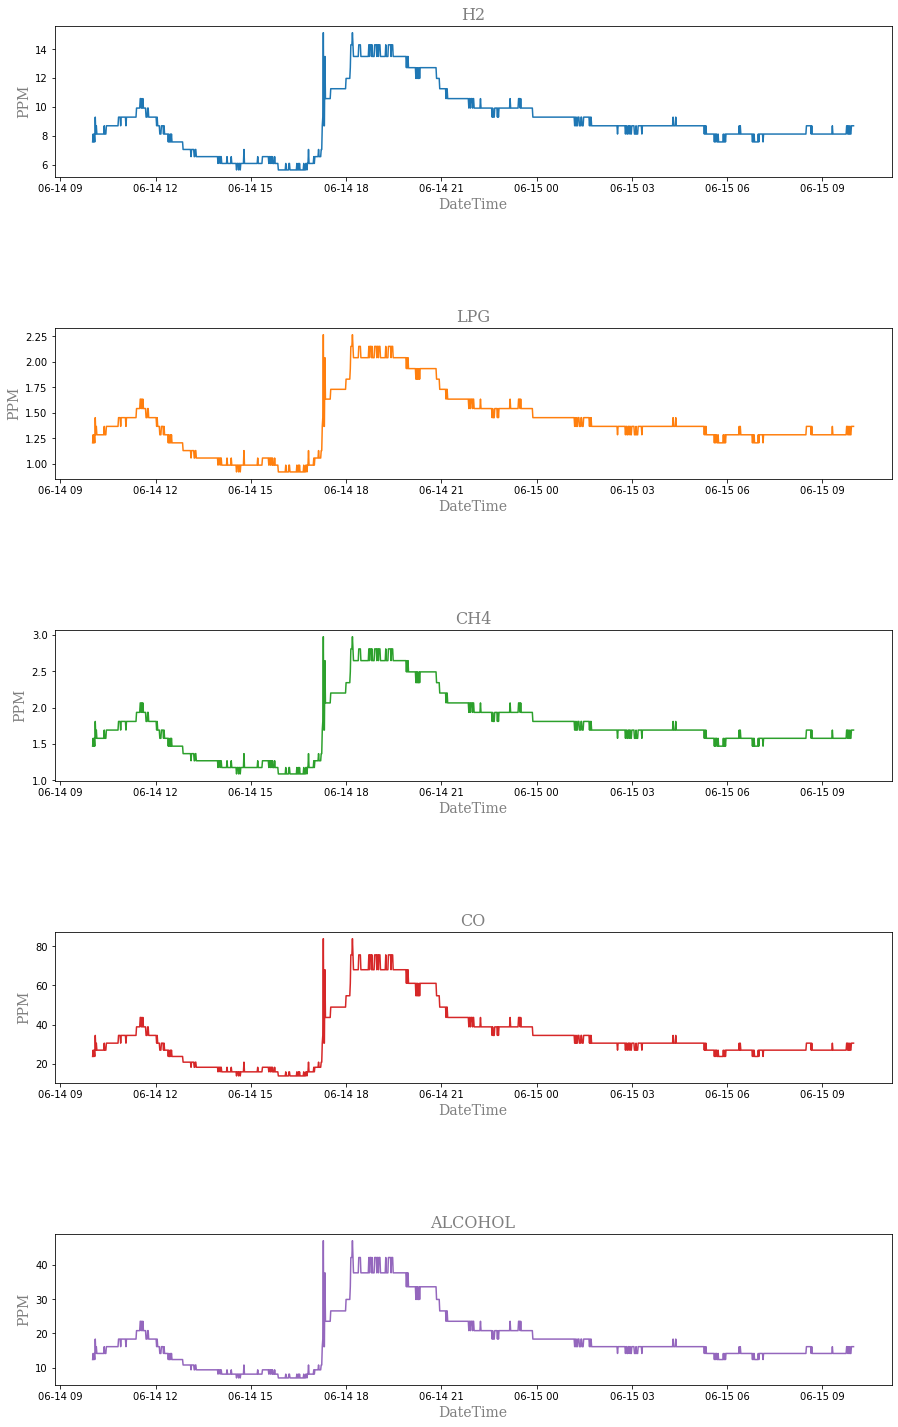

In [18]:
# Time Interval:
#           min: 2022-06-14 09:56:00
#           max: 2022-06-15 16:23:00 
  
fmq = mq5_2[(mq5_2['date'] > '6/14/22 10:00 AM') & (mq5_2['date'] < '6/15/22 010:00 AM')]

plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace = 1)

for idx in range(len(GASES)):
    plt.subplot(len(GASES) * 100 + 11 + idx)
    plt.plot(fmq['date']         , fmq[GASES[idx]],        color=colors[idx])
    plt.xlabel('DateTime'        , fontdict=font,          color='tab:gray')
    plt.ylabel('PPM'             , fontdict=font,          color='tab:gray')
    plt.title(GASES[idx].upper() , fontdict=font_title,    color='tab:gray')
    


plt.show()

In [19]:
# Save in excel file
mq5_1.to_csv('mq5_1.csv')
mq5_2.to_csv('mq5_2.csv')